<a href="https://colab.research.google.com/github/Kesavvinay/Data-Science-Intern/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
Terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv', on_bad_lines = 'skip', encoding = 'latin')
pd.set_option("display.max_columns",500)

<ipython-input-37-cbb3fb94bd1b>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  Terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv', on_bad_lines = 'skip', encoding = 'latin')


In [39]:
Terror.shape

(181691, 135)

In [40]:
Terror.head ()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [84]:
# extracting columns
cols = ['iyear','imonth','iday','country_txt','city','latitude',
        'longitude','location','attacktype1_txt','targetype1_txt','targsubtype1_txt','target1',
        'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail']

In [85]:
Terror_clean = pd.DataFrame(data = Terror, columns = cols)

In [86]:
Terror_clean.shape

(181691, 21)

In [87]:
Terror_clean.isnull ().sum ()

iyear                    0
imonth                   0
iday                     0
country_txt              0
city                   434
latitude              4556
longitude             4557
location            126196
attacktype1_txt          0
targetype1_txt      181691
targsubtype1_txt     10373
target1                636
gname                    0
motive              131130
weaptype1_txt            0
dbsource                 0
region_txt               0
nkill                10313
nwound               16311
natlty1_txt           1559
weapdetail           67670
dtype: int64

In [88]:
Terror_clean.head(2)

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targetype1_txt,targsubtype1_txt,target1,gname,motive,weaptype1_txt,dbsource,region_txt,nkill,nwound,natlty1_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN


In [89]:
Terror_clean.rename ( columns= {'iyear':'year',
                              'imonth':'month',
                              'iday':'day',
                              'country_txt':'country name',
                              'attacktype1_txt':'attacktype',
                              'targtype1_txt':'targtype',
                              'targsubtype2':'targsubtype2',
                              'gname':'group_name',
                              'weaptype1_txt':'weaptype',
                              'dbsource':'source',
                              'region_txt':'regionl',
                              'nkill':'killed',
                              'nwound':'wounded',
                              'weapdetail':'weapon_detail',
                              'natlty1_txt':'nationality'}, inplace = True )

In [90]:
pd.set_option("display.max_columns",500)

In [91]:
Terror_clean.head(5)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype1_txt,targsubtype1_txt,target1,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,NaN,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,NaN,Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,NaN,Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary


In [92]:
Terror_clean['casualities'] =Terror_clean['wounded'] + Terror_clean['killed']

In [93]:
Terror_clean.head(1)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype1_txt,targsubtype1_txt,target1,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0


In [94]:
nationality_top = Terror_clean[Terror_clean['nationality'] != 'Unknown']

In [95]:
nationality_type = nationality_top['nationality'].value_counts().reset_index()

In [96]:
nationality_type.rename(columns = {"index":'Nationality','nationality':'Counts'}, inplace = True)
nationality_type

,Nationality,Counts
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [97]:
Terror_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [98]:
terr = Terror_clean[Terror_clean['group_name']!= 'Unknown']
Terror_Group_Org = terr['group_name'].value_counts().reset_index()
Terror_Group_Org.rename(columns = {"index":'Group_name','group_name':'Counts'}, inplace = True)
Terror_Group_Org

,Group_name,Counts
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [99]:
Terror_clean.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype1_txt,targsubtype1_txt,target1,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,NaN,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [100]:
city1 = Terror_clean[Terror_clean['city']!='Unknown']

In [101]:
city_cln = city1['city'].value_counts().reset_index()
city_cln.rename(columns = {"index":'City_name','city':'Counts'}, inplace = True)
city_cln

,City_name,Counts
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Hotwag,1
36669,Ostend,1
36670,Balughata,1
36671,Jikoyi,1


In [102]:
# weapon type
wp = Terror_clean[Terror_clean['weaptype'] != 'Unkown']
weaptype_cln = wp['weaptype'].value_counts().reset_index()
weaptype_cln.rename(columns={"index":'weapon_type','weaptype':'Counts'}, inplace = True)
weaptype_cln

,weapon_type,Counts
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


In [103]:
#EDA of Terrorism
Terror_clean.head(1)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targetype1_txt,targsubtype1_txt,target1,group_name,motive,weaptype,source,regionl,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,NaN,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0


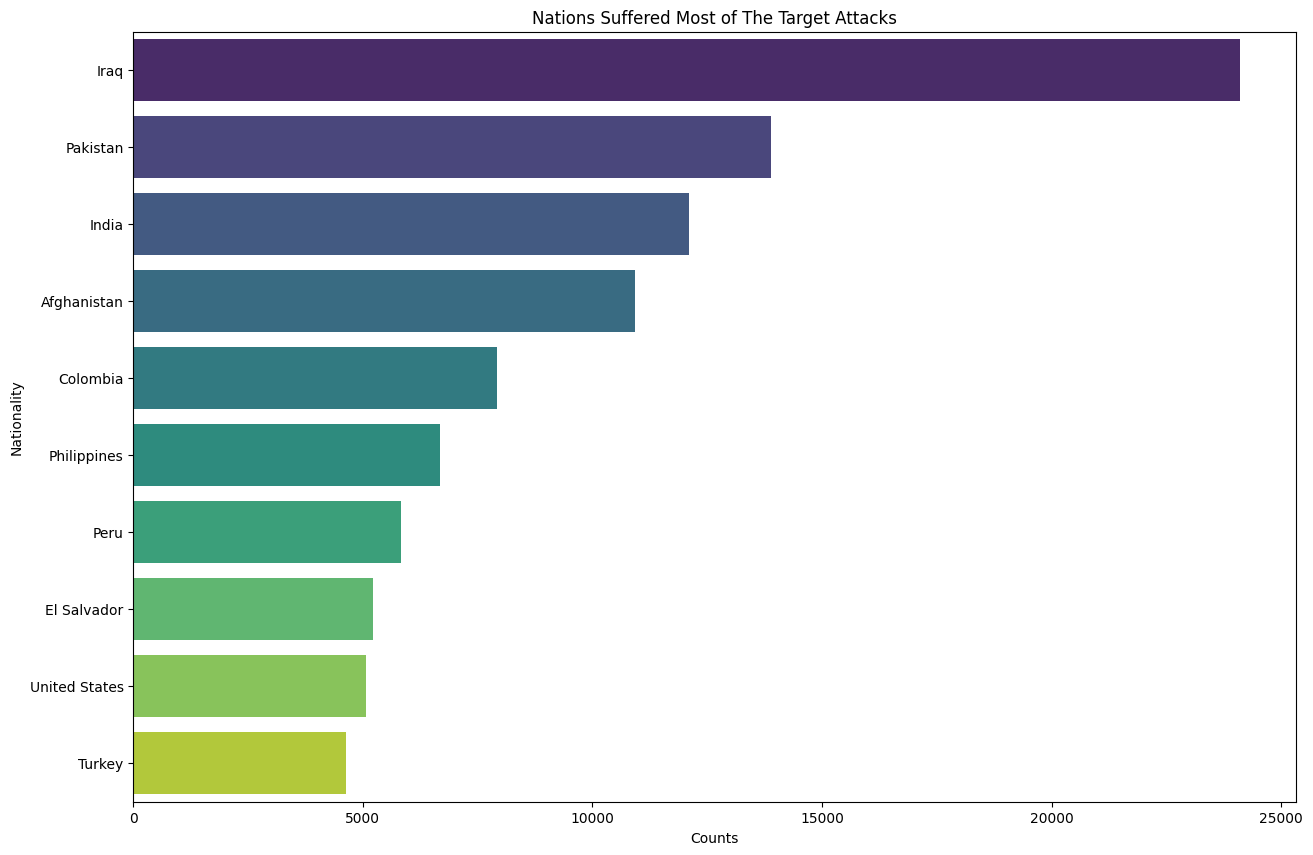

In [104]:
#Nationality
f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = "Counts", y="Nationality", data = nationality_type[:10],
                 palette = 'viridis').set_title('Nations Suffered Most of The Target Attacks')

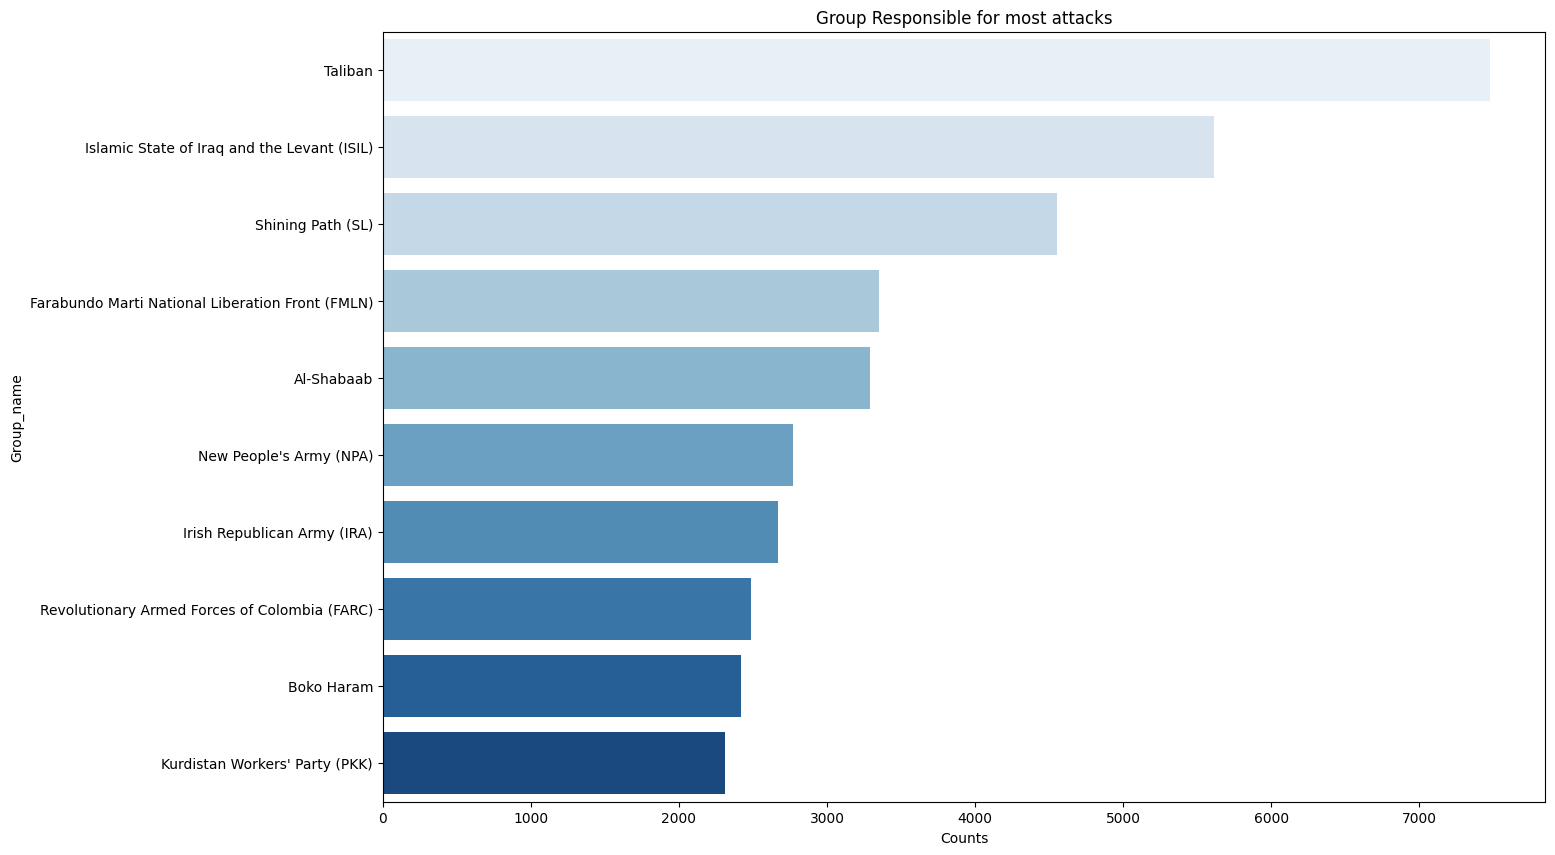

In [105]:
f , ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = "Counts", y = "Group_name", data = Terror_Group_Org[:10],
                 palette = "Blues").set_title("Group Responsible for most attacks")

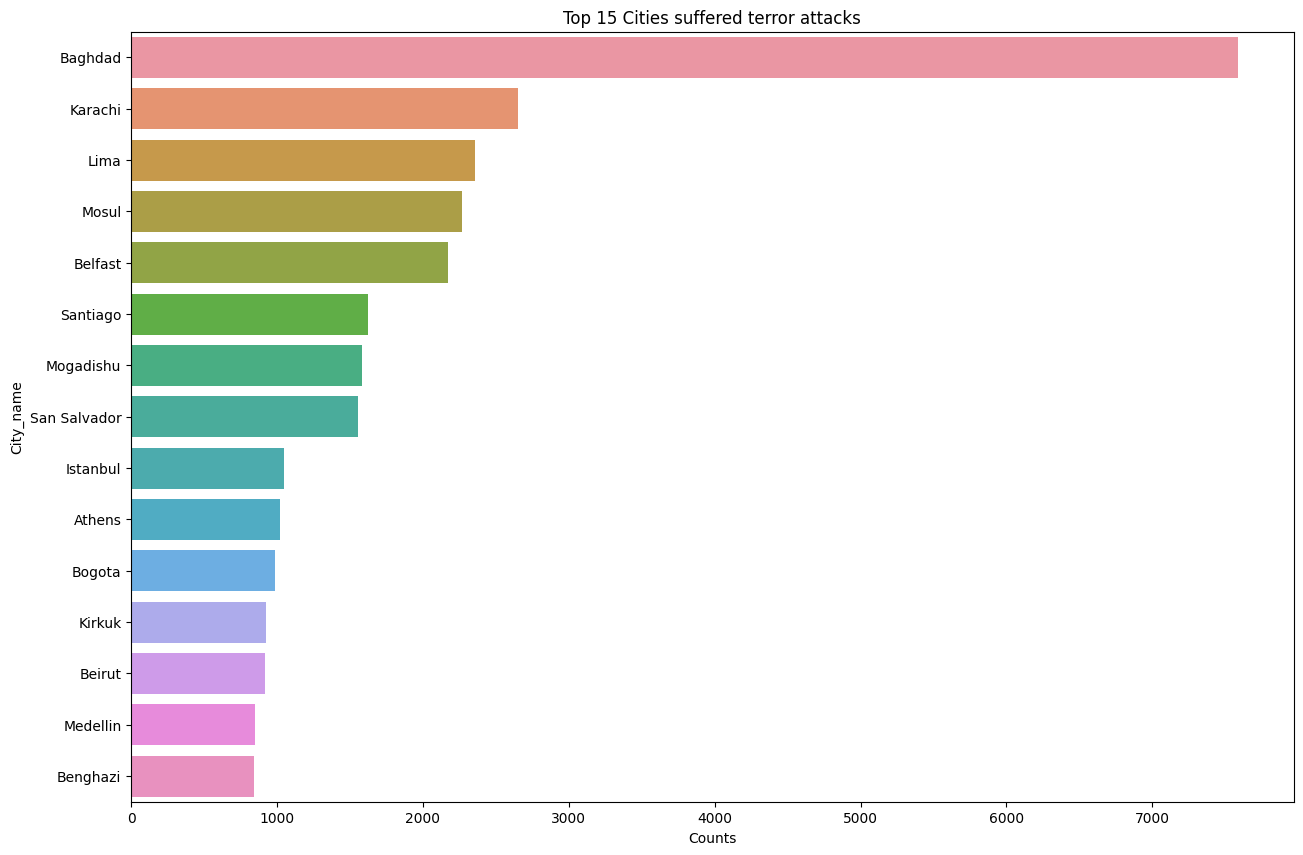

In [106]:
f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = "Counts", y="City_name", data = city_cln[:15]).set_title('Top 15 Cities suffered terror attacks')

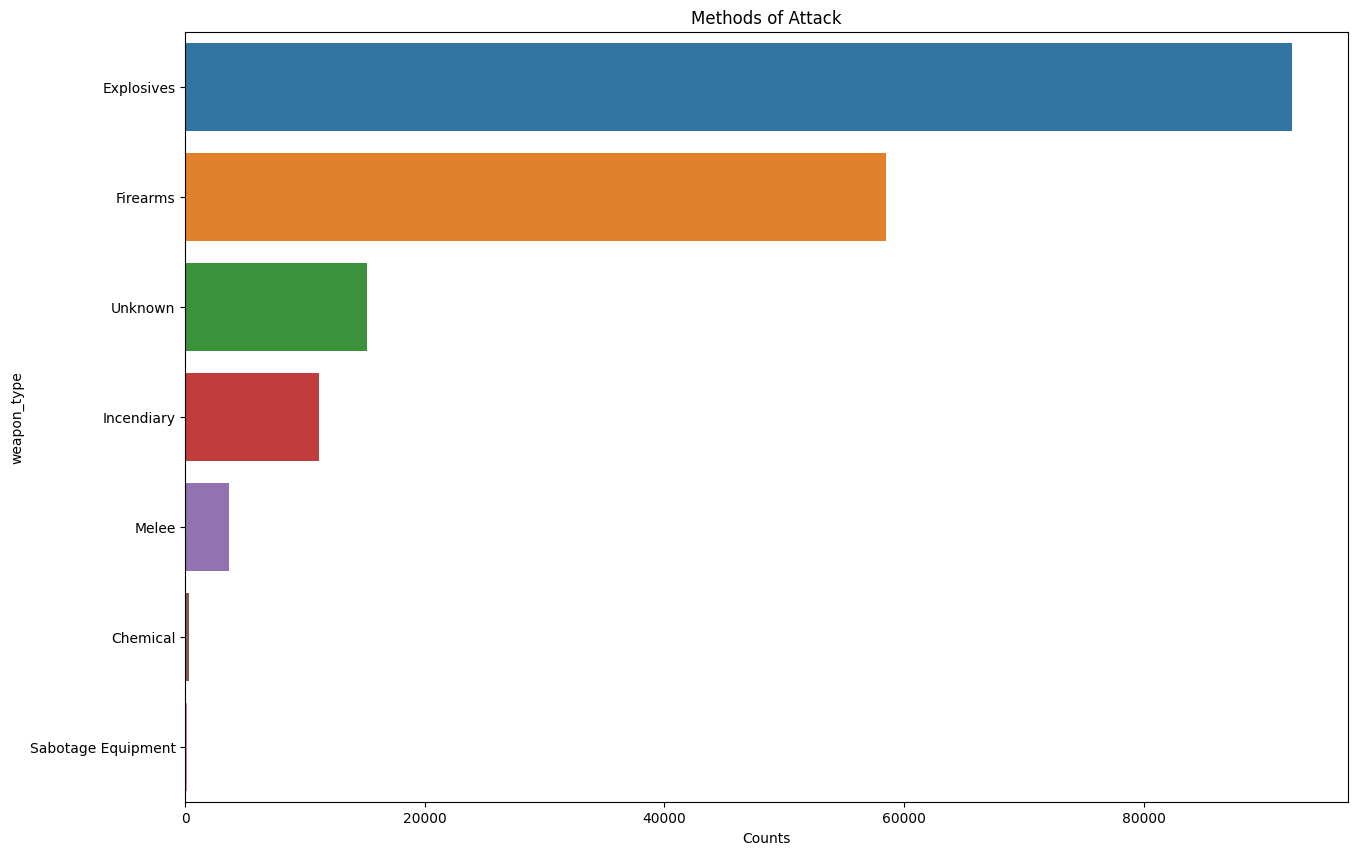

In [107]:
f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x= 'Counts', y = 'weapon_type', data = weaptype_cln[:7]).set_title('Methods of Attack')

In [108]:
Terror_clean['attacktype'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

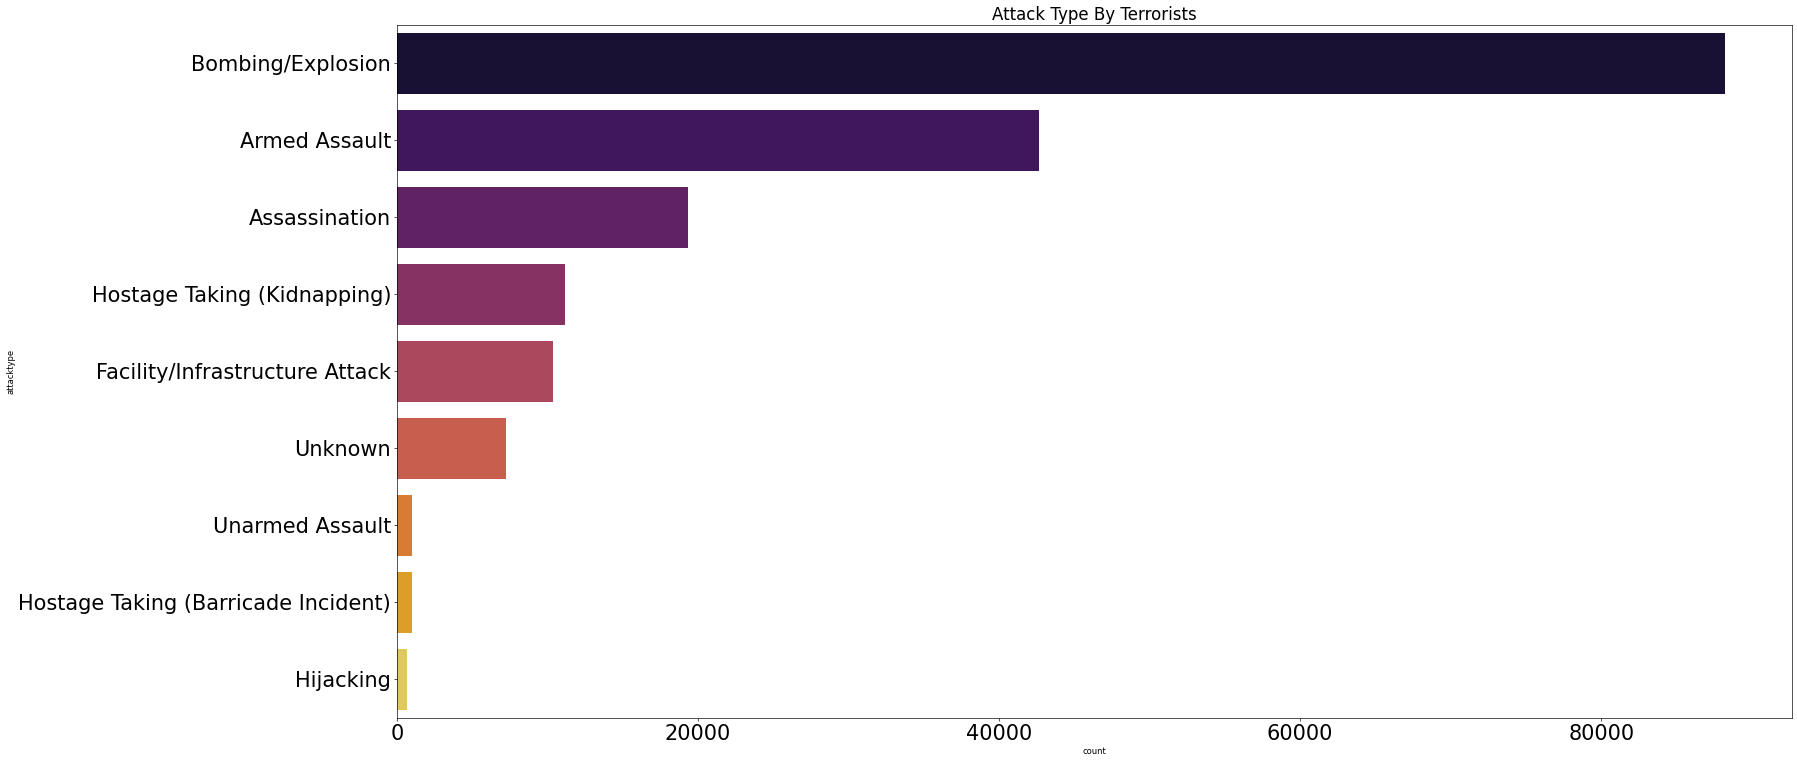

In [109]:
plt.subplots(figsize = (30,15), dpi = 60)
sns.countplot(y = 'attacktype', data = Terror_clean, palette = 'inferno', order = Terror_clean['attacktype'].value_counts().index)
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.title('Attack Type By Terrorists', size = 20)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

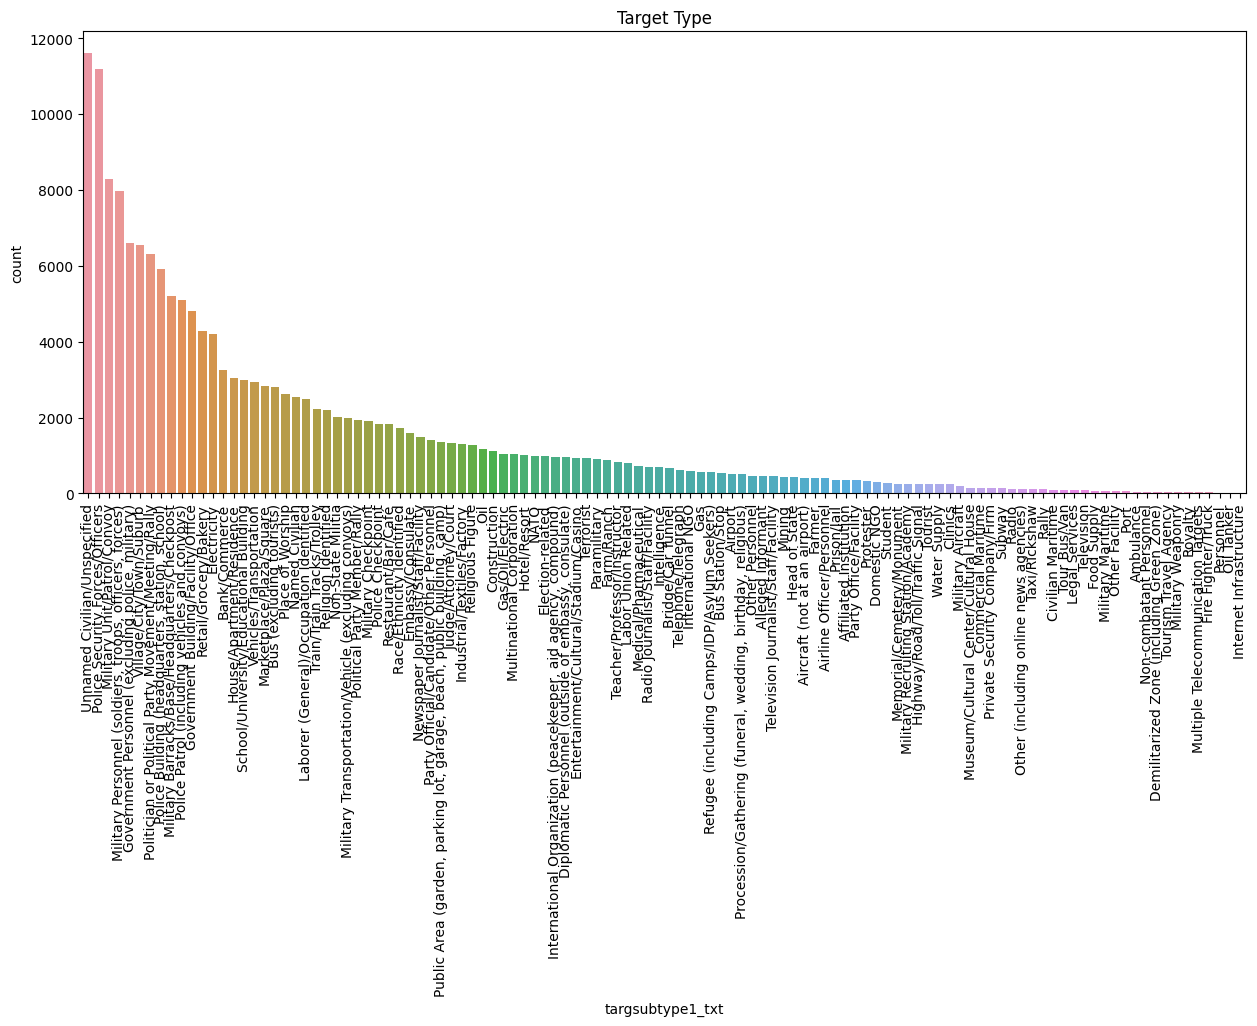

In [111]:
plt.subplots( figsize = (15,6), dpi = 100 )
sns.countplot( x = Terror_clean['targsubtype1_txt'], order = Terror_clean['targsubtype1_txt'].value_counts().index )
plt.xticks(rotation = 90)
plt.title('Target Type')
plt.show

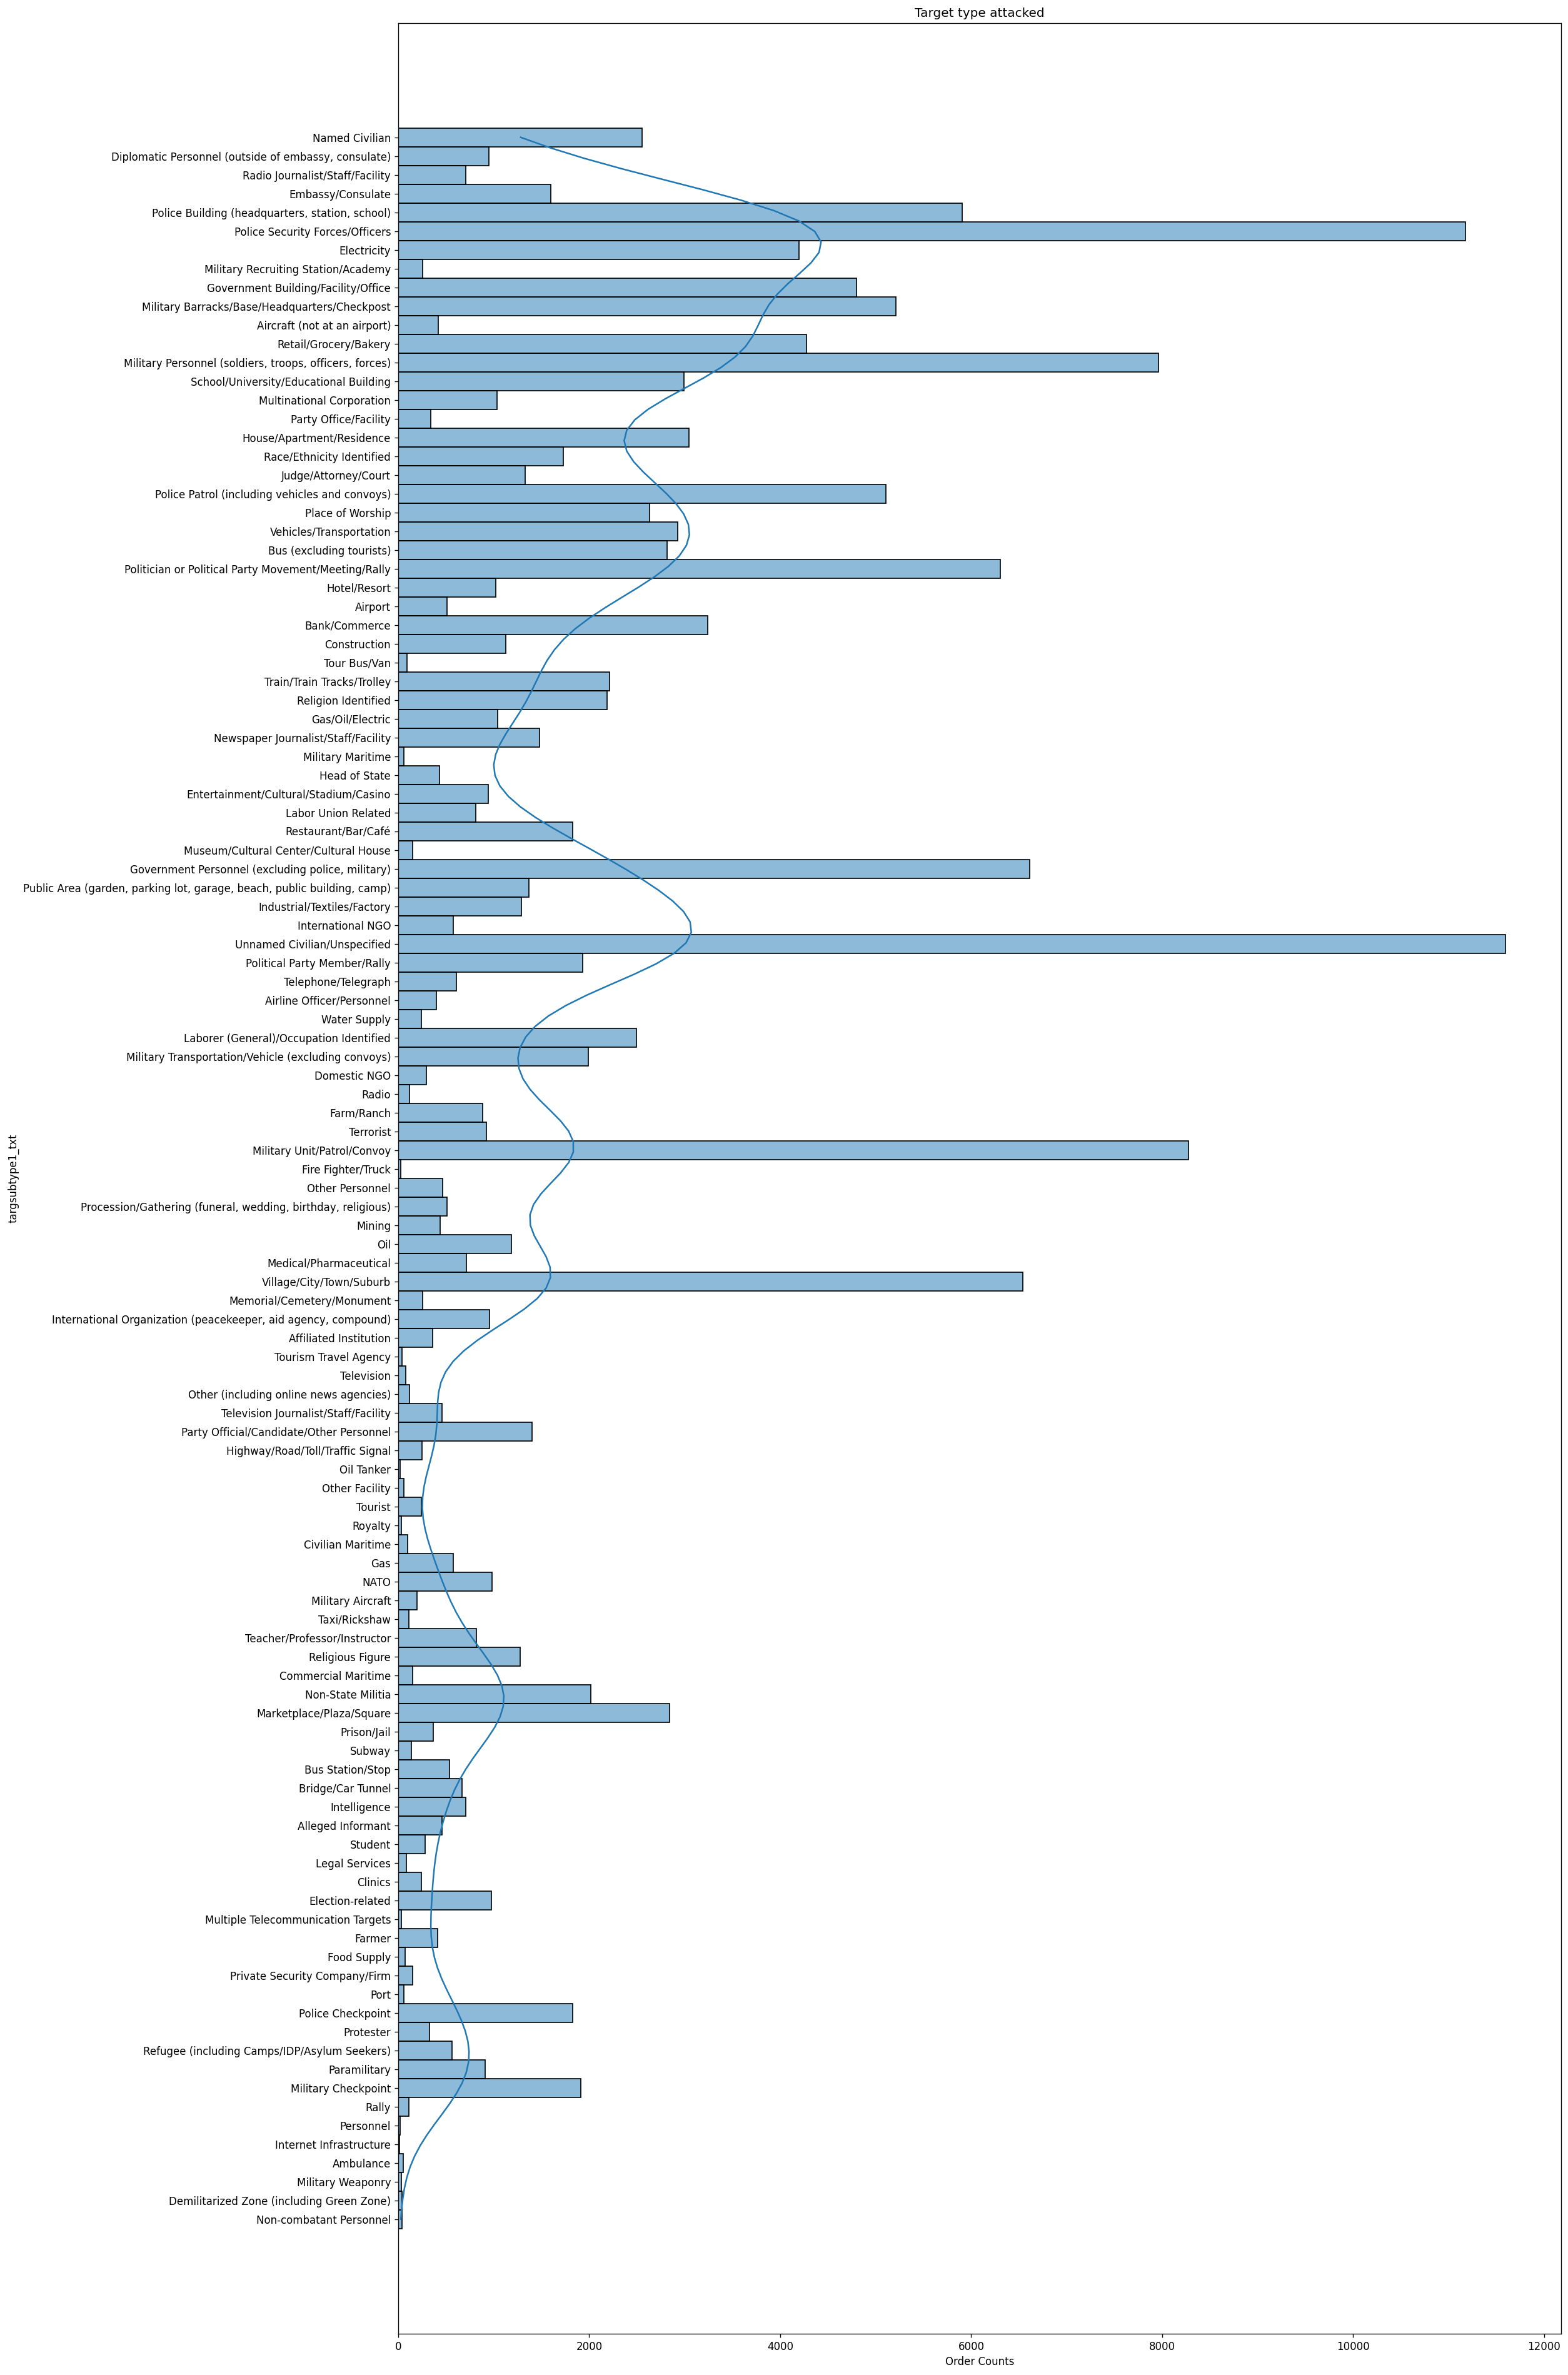

In [115]:
plt.figure(figsize = (20,40), dpi = 120)
sns.histplot(data = Terror_clean,
             y = 'targsubtype1_txt',
             bins = 15,
             kde = True)
plt.xlabel('Order Counts')
plt.title('Target type attacked')
plt.show()